In [3]:
import requests
import re
import pandas as pd
import numpy as np

url = 'http://www.bjsubway.com/station/zjgls/'  #get URL Address
source_page = requests.get(url)


In [4]:
source_page.encoding = 'gb2312' #encode content to show chinese charactors
content = source_page.text


In [5]:
findings = r"(?<=<a href=\"#\">).*(?=</a></li>)"
pattern = re.compile(findings)
subway_lines = pattern.findall(content)

#lines = re.findall('?<=(/>).*?<=(/<)',lines_raw)  #WRONG!! **expr MUST be compiled first** 
subway_lines

['1号线',
 '2号线',
 '4号线',
 '5号线',
 '6号线',
 '7号线',
 '8号线',
 '9号线',
 '10号线',
 '13号线',
 '14号线',
 '15号线',
 '八通线',
 '昌平线',
 '亦庄线',
 '大兴线',
 '房山线',
 '机场线']

In [6]:
stations_pair = []     #2 connected stations
stations_cost = []
findings_2 = r"(?<=<th>).*(?=</th>)"  #find stations
findings_3 = r"(?<=<td>)\d.*\d(?=</td>)"  #find route cost
pattern_2 = re.compile(findings_2)
pattern_3 = re.compile(findings_3)
for lines in content.split('</table>'):
    stations_pair.append(re.findall(pattern_2,lines))
    stations_cost.append(re.findall(pattern_3,lines))
stations_pair.pop(-1)
stations_cost.pop(-1)
stations_cost[0].insert(0,2606) # insert distance_value due to page error


In [7]:
findings_4 = r"<td colspan=\"\d\">.*相邻站间距信息统计表</td>"  # debug用途代码，线路数量不匹配，寻找错误
pattern_4 = re.compile(findings_4)
sbway_line = []
for lines in content.split('</table>'):
    sbway_line.append(pattern_4.findall(lines))
sbway_line.pop(-1)

[]

In [8]:
from collections import defaultdict
station_connect_with_cost = defaultdict(list)
stations = []
cost = []
for i, term1 in enumerate(stations_pair):
    stations+=stations_pair[i]
for i, term1 in enumerate(stations_cost):
    cost += stations_cost[i]
#station_connect_with_cost = {stations[x]:cost[x] for x in range(len(stations))} #defaultdict do not work in this condition
for x in range(len(stations)):
    station_connect_with_cost[stations[x]].append(cost[x]) #构建相邻两转距离字典，上行

In [9]:
stations_reverse = []
for word in stations:
    first , second = word.split('――')
    stations_reverse.append(second+'――'+first)
for i in range(len(stations_reverse)):
    station_connect_with_cost[stations_reverse[i]].append(cost[i])#构建相邻两站距离字典，上行+下行

In [10]:
def getdistance_pair_stations(word1,word2):
    name = word1+'――'+word2
    #print(station_connect_with_cost[name])
    if len(station_connect_with_cost[name]) :
        return int(station_connect_with_cost[name][0])
    else: 
        return 0
#站与站之间的距离字典

In [11]:
getdistance_pair_stations('六道口','三元桥') #测试一下,获取相邻两站之间的距离，既可以上行也可以下行

0

In [12]:
stations_by_line = []
stations_all = []
for x in range(len(stations_pair)):
    for line in stations_pair[x]:
        start,end = line.split('――')
        #print(start,end)
        stations_all.append(start)
        stations_all.append(end)
    stations_by_line.append(list(set(stations_all)))
    stations_all = []



In [13]:
#线路和每条线路对应的车站字典
print(stations_by_line)

[['木樨地', '八宝山', '公主坟', '永安里', '四惠东', '东单', '建国门', '万寿路', '王府井', '军事博物馆', '国贸', '南礼士路', '复兴门', '天安门西', '玉泉路', '八角游乐园', '苹果园', '大望路', '四惠', '西单', '天安门东', '五棵松', '古城'], ['鼓楼大街', '长椿街', '阜成门', '和平门', '宣武门', '东四十条', '北京站', '安定门', '雍和宫', '前门', '崇文门', '车公庄', '朝阳门', '复兴门', '建国门', '西直门', '积水潭', '东直门'], ['陶然亭', '北京大学东门', '西苑', '西直门', '人民大学', '北京南站', '动物园', '平安里', '圆明园', '北宫门', '新街口', '中关村', '魏公村', '西四', '宣武门', '西单', '灵境胡同', '马家堡', '角门西', '安河桥北', '菜市口', '国家图书馆', '公益西桥', '海淀黄庄'], ['磁器口', '灯市口', '雍和宫', '北新桥', '东单', '北苑路北', '张自忠路', '天坛东门', '惠新西街北口', '天通苑北', '东四', '宋家庄', '崇文门', '和平西桥', '和平里北街', '惠新西街南口', '刘家窑', '大屯路东', '立水桥', '天通苑', '蒲黄榆', '天通苑南', '立水桥南'], ['通州北关', '北海北', '北运河东', '北运河西', '慈寿寺', '通运门', '海淀五路居', '东夏园', '花园桥', '郝家府', '白石桥南', '平安里', '车公庄西', '黄渠', '十里堡', '东大桥', '青年路', '东四', '呼家楼', '车公庄', '常营', '金台路', '南锣鼓巷', '物资学院路', '朝阳门', '潞城', '草房', '褡裢坡'], ['磁器口', '百子湾', '湾子', '广安门内', '化工', '珠市口', '虎坊桥', '垡头', '大郊亭', '双井', '南楼梓庄', '双合', '焦化厂', '广渠门内', '菜市口', '欢乐谷景区', '九龙山', '达官营', '桥湾', '北京西站', '广渠门外'

In [14]:
west_14 = stations_by_line.pop(10)
east_14 = stations_by_line.pop(10)
stations_by_line.insert(10,west_14+east_14) #合并14号线东西两段的站点

In [15]:
line_with_stations = defaultdict(list)
for i in range(len(stations_by_line)):
    line_with_stations[subway_lines[i]].extend(stations_by_line[i])
print(line_with_stations) 
print(station_connect_with_cost)

defaultdict(<class 'list'>, {'1号线': ['木樨地', '八宝山', '公主坟', '永安里', '四惠东', '东单', '建国门', '万寿路', '王府井', '军事博物馆', '国贸', '南礼士路', '复兴门', '天安门西', '玉泉路', '八角游乐园', '苹果园', '大望路', '四惠', '西单', '天安门东', '五棵松', '古城'], '2号线': ['鼓楼大街', '长椿街', '阜成门', '和平门', '宣武门', '东四十条', '北京站', '安定门', '雍和宫', '前门', '崇文门', '车公庄', '朝阳门', '复兴门', '建国门', '西直门', '积水潭', '东直门'], '4号线': ['陶然亭', '北京大学东门', '西苑', '西直门', '人民大学', '北京南站', '动物园', '平安里', '圆明园', '北宫门', '新街口', '中关村', '魏公村', '西四', '宣武门', '西单', '灵境胡同', '马家堡', '角门西', '安河桥北', '菜市口', '国家图书馆', '公益西桥', '海淀黄庄'], '5号线': ['磁器口', '灯市口', '雍和宫', '北新桥', '东单', '北苑路北', '张自忠路', '天坛东门', '惠新西街北口', '天通苑北', '东四', '宋家庄', '崇文门', '和平西桥', '和平里北街', '惠新西街南口', '刘家窑', '大屯路东', '立水桥', '天通苑', '蒲黄榆', '天通苑南', '立水桥南'], '6号线': ['通州北关', '北海北', '北运河东', '北运河西', '慈寿寺', '通运门', '海淀五路居', '东夏园', '花园桥', '郝家府', '白石桥南', '平安里', '车公庄西', '黄渠', '十里堡', '东大桥', '青年路', '东四', '呼家楼', '车公庄', '常营', '金台路', '南锣鼓巷', '物资学院路', '朝阳门', '潞城', '草房', '褡裢坡'], '7号线': ['磁器口', '百子湾', '湾子', '广安门内', '化工', '珠市口', '虎坊桥', '垡头', '大郊亭', '双井', '南楼梓庄', '

In [16]:
#数据构建完毕，开始画图，每个站点有标签，并且每条线的颜色不同
#自己遍历自己来判断是否有环线。

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

subway = nx.Graph()
for keys in line_with_stations:#遍历线路字典
  
    for c1 in line_with_stations[keys]:
        for c2 in line_with_stations[keys]:
            distance = getdistance_pair_stations(c1,c2)#获取两站之间的路程
            #print(distance)
            if c1 == c2: 
                subway.add_node(c1)
            if distance == 0: continue
            if distance >0 :
                subway.add_node(c2)
                subway.add_edge(c1,c2,weight = distance)


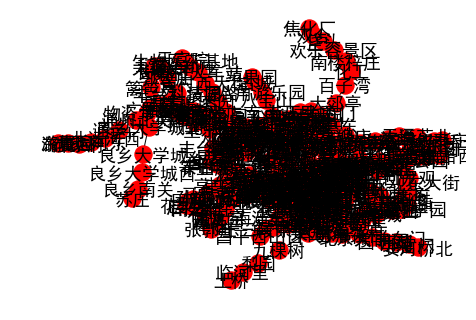

In [22]:
nx.draw(
        subway,
        pos = nx.spring_layout(subway),
        node_color = 'red',
        edge_color = 'black',
        with_labels = True,
        font_size = 18,
        nod_size = 20
        )


In [19]:
subway.number_of_nodes() #北京地铁车站数量

288

In [20]:
print(nx.dijkstra_path(subway,'公主坟','回龙观'))

['公主坟', '军事博物馆', '白堆子', '白石桥南', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '知春里', '知春路', '五道口', '上地', '西二旗', '龙泽', '回龙观']


In [31]:
def search(c1,c2):
    
    path = nx.dijkstra_path(subway,c1,c2)
    return ''.join(station+'->' for station in path)[:-2]

In [36]:
search('百子湾','天安门西')

'百子湾->大郊亭->九龙山->双井->国贸->永安里->建国门->东单->王府井->天安门东->天安门西'